# Lecture 3 - Stability in 2D and Julia's Type System

## Outline of the first Topic Block 

| # | Dynamical Systems        | Julia and Programming           |   |   |
|---|---------------------------------|---------------------------------------|---|---|
| 1 | Introduction + DE Solvers       | Introduction to Julia                 |   |   |
| 2 | Stability and Bifurcations I    | Pkg.jl, DifferentialEquations.jl, Git |   |   |
| **3** | **Stability and Bifurcations II**   | **Julia’s type system**                   |   |   |
| 4 | Chaos I                         | DynamicalSystems.jl                   |   |   |
| 5 | Chaos II + Time-delay Embedding | DynamicalSystems.jl                   |   |   |

## Last Time 

* **Stability of Differential Equations** 
    * The fixed points $x_*$ of a DE $\dot{x} = f(x)$ are its steady states / equilibrium points for which $f(x_*)=0$. Their stability can be determined by inspecting the derivatives of the RHS:  
        * for $$f'(x_*) > 0$$ we have unstable fixed points 
        * for $$f'(x_*) < 0$$ we have stable fixed points
 
* **Bifurcations**: Are qualitative changes of the dynamics of a system, e.g. fixed points changing their stability, or appearing and disappearing 
    * We usually study them with normal forms and bifurcation diagrams, such as the saddle-node bifurcation: $$\frac{dx}{dt} = \theta + x^2$$
 
    * 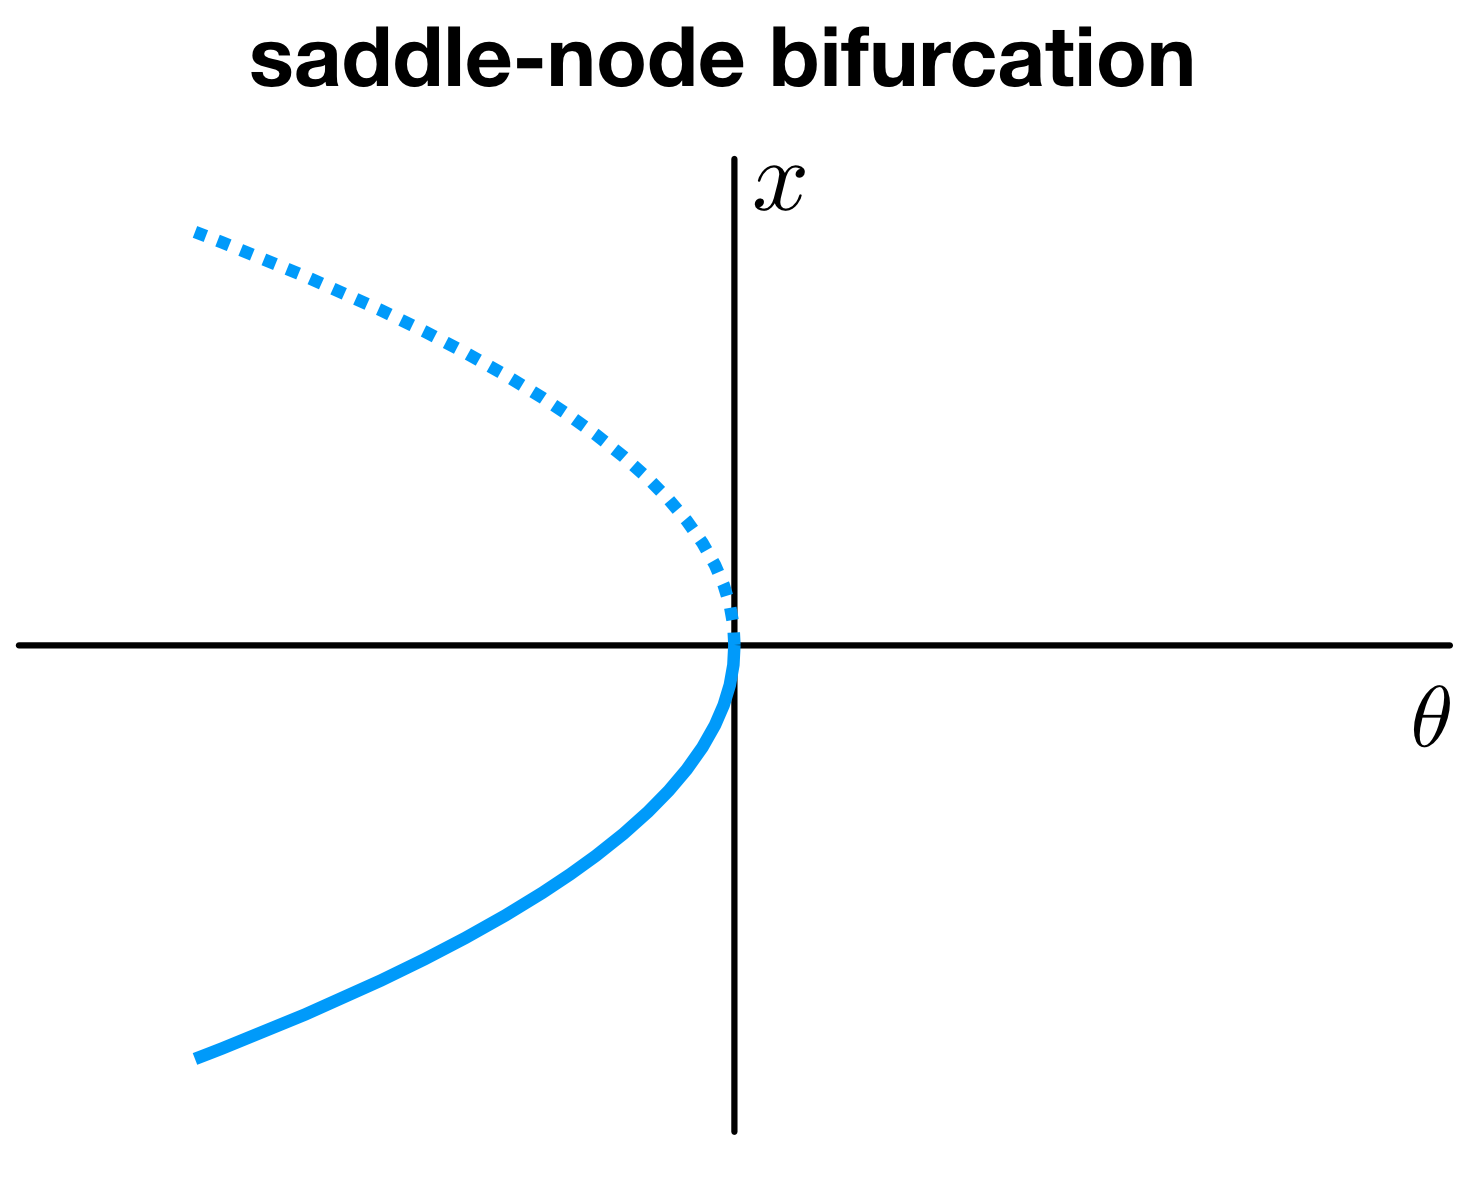


# Phase Portraits and Stability of Differential Equations in 2D 

So, what happens in higher dimensions? 
 

## Two-Dimensional Systems

* In the exercise you were working with the Lotka-Volterra model for predator-prey dynamics of e.g. hares (H) and foxes (F)

$$\frac{dH}{dt} = \alpha H - \beta HF$$
$$\frac{dF}{dt} = -\gamma F + \delta HF$$

* We saw oscillations between the predator and prey population and also extinction events
* We’ll try to formalize in the following how to understand the behaviour of 2D models


## Lotka-Volterra System 

.. and a small reminder of DifferentialEquations.jl

  Activating project at `~/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-3`
   Resolving package versions...
  No Changes to `~/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-3/Project.toml`
  No Changes to `~/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-3/Manifest.toml`
┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


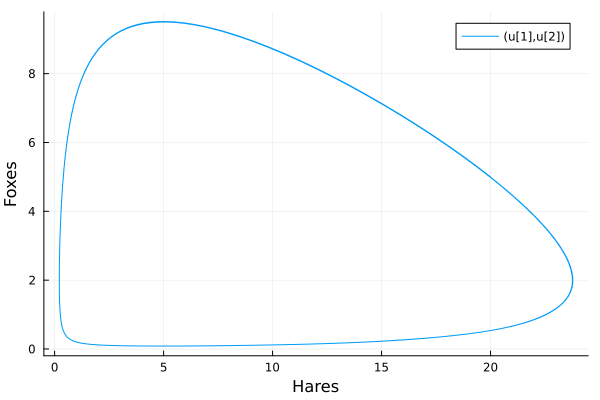

In [1]:
import Pkg 
Pkg.activate(".")
Pkg.add(["Plots","DifferentialEquations"]) # add if there are not already there
using Plots, DifferentialEquations 

function lotka_volterra(x,p,t)
    H, F = x 
    α, β, γ, δ = p 
    return [α*H - β*H*F, 
    -γ*F + δ*H*F]
end

α = 1.; β = 0.5; γ = 1.; δ = 0.2
p = [α, β, γ, δ] 
x0 = [20., 5.] 
tspan = (0.,20.)
prob = ODEProblem(lotka_volterra, x0, tspan, p)
sol = solve(prob);
plot(sol, vars=(1,2), xlabel="Hares", ylabel="Foxes")

## 2D Phase Plots: Harmonic Oscillator 

* Let’s start with an easier system: the harmonic oscillator $m\ddot{x}+kx=0$

$$ \frac{dx}{dt} = v $$
$$ \frac{dv}{dt} = -\frac{k}{m} x$$

* We define the system in Julia
* Then, let’s plot the rhs as a vector field 


In [2]:
function harmonic_oscillator(u,p,t)
    m, k = p 
    x, v = u 
    dx = v 
    dv = - (k/m)*x 
    [dx, dv]
end 
x0 = [1.,0.]
p = [1.,1.]
prob = ODEProblem(harmonic_oscillator, x0, (0.,100.),p)

sol = solve(prob);

In [3]:
function vector_field_plot(x_range, y_range, rhs, p; kwargs...) 
    
    # we do a meshgrid 
    x_grid = x_range' .* ones(length(x_range)) # x_grid is a 9x9 matrix with all coordinates
    y_grid = ones(length(y_range))' .* y_range
    
    dx_grid = similar(x_grid)
    dy_grid = similar(y_grid)
    for i ∈ eachindex(x_grid)
        dx_grid[i], dy_grid[i] = 
        rhs([x_grid[i], y_grid[i]],p,0.)
    end
    
    return quiver(x_grid,y_grid,quiver=(dx_grid, dy_grid); 
    kwargs...)
end 

vector_field_plot (generic function with 1 method)

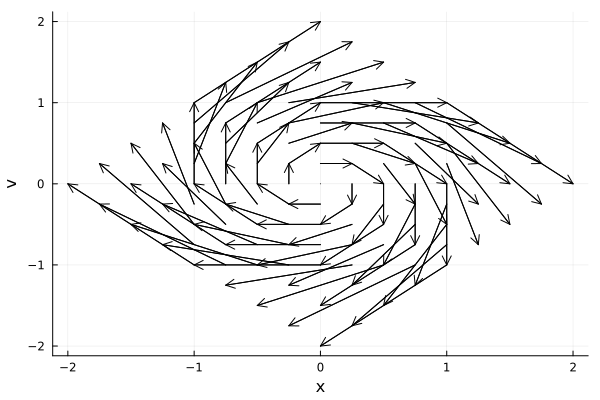

In [4]:
x=-1:0.25:1 
v=-1:0.25:1 
fig = vector_field_plot(x, v, harmonic_oscillator, p; color=:black, xlabel="x", ylabel="v")

* Trajectories will move along this vector field!
* When we add the trajectories in phase space, we get a **phase portrait**
* The trajectories form **closed orbits**
* The origin is a fixed point



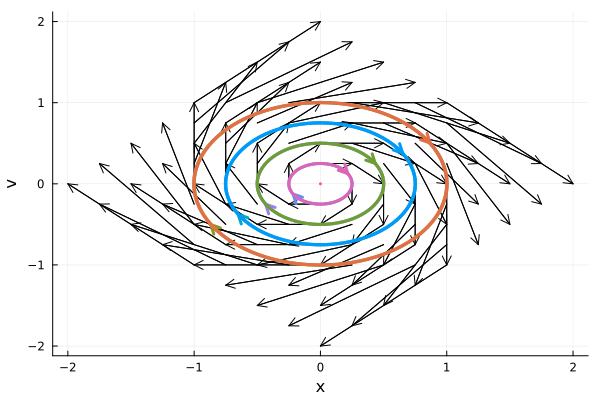

In [5]:
u_0 = hcat(-1:0.25:1, zeros(length(x)))
for i ∈ 1:size(u_0,1)
    plot!(fig, solve(remake(prob, u0=u_0[i,:])), 
    vars=(1,2), arrows=true, legend=nothing, 
    linewidth=3, xlabel="x", ylabel="v")
end 
fig

## 2D Systems 

* As long as the rhs is continuously differentiable, solutions always exist and are unique, this also implies that **trajectories never intersect** in phase portraits (solutions wouldn’t be unique if they would) 
* We will look at another simple system (it is also analytically solvable)
  $$ \frac{dx}{dt} = ax$$
  $$ \frac{dy}{dt} = -y$$


In [6]:
function f(u,p,t)
    a, = p
    x, y = u 
    [a*x, -y]
end 
x0 = [1.,0.]
p = [-2.]
prob = ODEProblem(f, x0, (0.,2.),p);

## Stable Node 

* For $a<0$, we have fixed point in the origin which is also called a **stable node** or sink

In [7]:
function phase_plot(x_range, y_range, prob, p; kwargs...) 
    
    # we do a meshgrid 
    x_grid = x_range' .* ones(length(x_range))
    y_grid = ones(length(y_range))' .* y_range
    
    fig = plot()
    for i ∈ eachindex(x_grid)
       plot!(fig, solve(remake(prob; u0=[x_grid[i],y_grid[i]],p=p)), 
    vars=(1,2); kwargs...)
    end
    
    return fig
end 

phase_plot (generic function with 1 method)

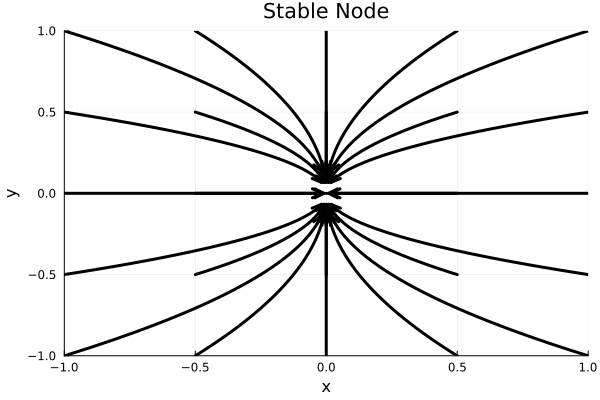

In [8]:
fig = phase_plot(-1:0.5:1, -1:0.5:1, prob, [-2.]; arrows=true, legend=nothing, 
    linewidth=3, xlabel="x", ylabel="y",xlims=[-1,1],ylims=[-1,1], color=:black, title="Stable Node")

## Line of Fixed Points 

* For $a=0$, all points on the x axis are stable fixed points 


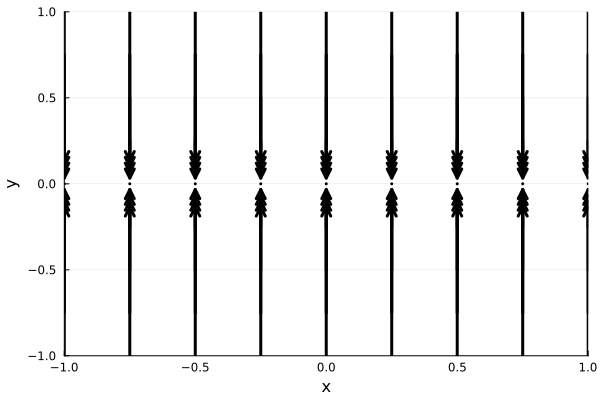

In [9]:
fig = phase_plot(-1:0.25:1, -1:0.25:1, prob, [0]; arrows=true, legend=nothing, 
    linewidth=3, xlabel="x", ylabel="y",xlims=[-1,1],ylims=[-1,1], color=:black)

* For $a>0$, we have a saddle point, a saddle point has one stable manifold (here the y axis) and one unstable manifold (here the x axis) 


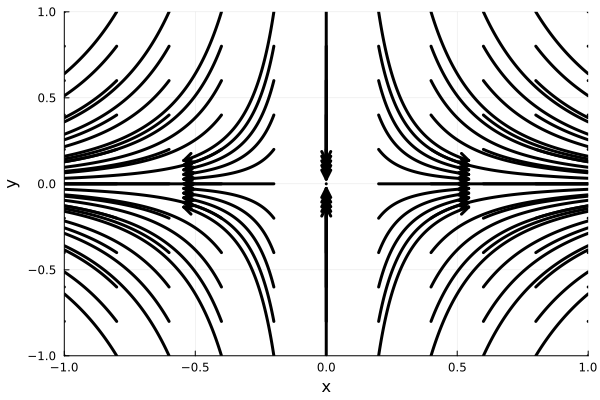

In [10]:
fig = phase_plot(-1:0.2:1, -1:0.2:1, prob, [0.5]; arrows=true, legend=nothing, 
    linewidth=3, xlabel="x", ylabel="y",xlims=[-1,1],ylims=[-1,1], color=:black)

## Stability in 2D

* We will again discuss a linear system, nonlinear systems can be approximated close to their fixed points by the linear system as long as we don’t have an edge case similar to the discussion in 1D
  $$ \frac{d}{dt}\begin{pmatrix}x \\ y\end{pmatrix} = \begin{pmatrix}a & b \\ c & b\end{pmatrix}\begin{pmatrix}x \\ y\end{pmatrix}$$

  $$ \frac{\mathbf{x}}{dt} = \mathbf{A}{x}$$


* We look for solutions of the form $\mathbf{x}(t) = e^{\lambda t}\mathbf{v}$, for some constant vector
* When we substitute this into the DE, we get an eigenvalue problem:

    $$\mathbf{A}\mathbf{v}=\lambda\mathbf{v}$$

* Eigenvalues $\lambda$ are given by the characteristic equation $\det(\mathbf{A}-\lambda\mathbf{1})$

* It follows that:
$$\begin{align}
\det(\mathbf{A}-\lambda\mathbf{1}) &= (a - \lambda)(d - \lambda) - cb \\
&= \lambda^2 - \tau\lambda + \det(A)\end{align}$$
with
$$\begin{align}
\tau &= \text{trace}(A) = a + d\\
\det(A) &= ad - bc\end{align}$$

* Eigenvalues follow as $$\lambda_{1,2} = \frac{\tau\pm\sqrt{\tau^2 - 4\det(A)}}{2}$$

* There are two eigenvalues and eigenvectors that form the general solution to the ODE: $$\mathbf{x}(t)=c_1 e^{\lambda_1 t}\mathbf{v}_1 + c_2 e^{\lambda_2 t}\mathbf{v}_2$$

* The eigenvalues, their sign and whether or not they are real or complex determines the stability
* This can be visualised in the Poincaré diagram that shows all possible phase portraits of linear 2D systems

_(Figure from Freesodas via Wikipedia, CC BY-SA)_

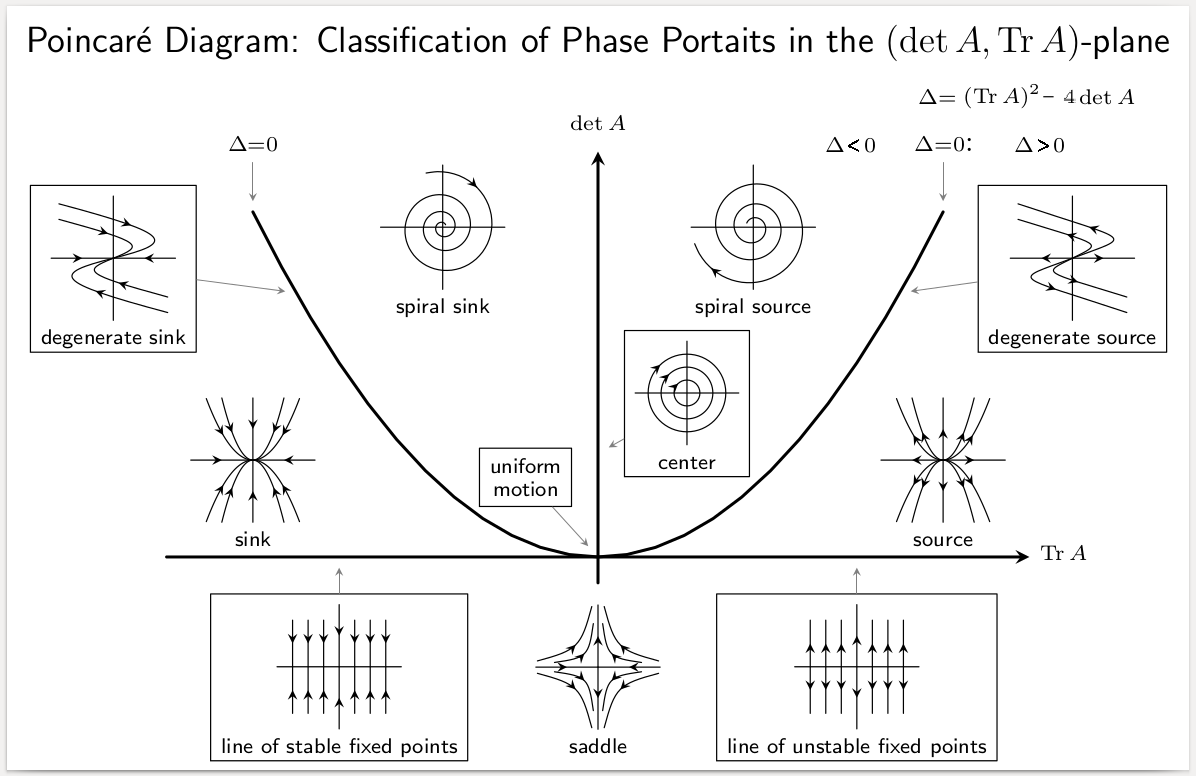

## Nonlinear 2D Systems 

* We can use the same classification for nonlinear systems, if we linearize them:  
$$\begin{align}
\frac{dx}{dt} &= f(x,y)\\
\frac{dy}{dt} &= g(x,y)
\end{align}$$

* to: 
$$\begin{align}
\frac{d}{dt}\begin{pmatrix}x \\ y\end{pmatrix} &= \begin{pmatrix}\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y}\\\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}\end{pmatrix}
\begin{pmatrix}x\\y\end{pmatrix} + \mathcal{o}(x^2,y^2,xy)\\
&= \mathbf{J}\begin{pmatrix}x\\y\end{pmatrix} + \mathcal{o}(x^2,y^2,xy)
\end{align}$$

* The linearization holds as long as $\mathcal{R}(\lambda)\neq 0$ 

## Further Reading & Outlook

* Strogatz: “Nonlinear Dynamics and Chaos” 
* Next Time: Chaos! 

**NOTE**: Restart the Julia session here, DifferentialEquations.jl adds some more type information that we are not interested in for the initial demonstration here

# Julia - Types, Methods and Multiple Dispatch

## Julia, The Story So Far

- In lecture 1, we introduced the basics of the Julia programming language, including arrays, functions, and basic flow control.
- In lecture 2, we introduced Pkg.jl, the Julia package manager, and the library DifferentialEquations.jl.
- Today, we'll "remove the training wheels" and discuss Julia's type system in a lot more detail than before.

## Contents
1. [Types](#types)
2. [Composite Types](#composite-types)
3. [Parametric Types](#parametric-types)
4. [Methods and Multiple Dispatch](#methods)
5. [Parametric Methods](#parametric-methods)
6. [Conclusion](#conclusion)
7. [Further Reading](#further-reading)
8. [Next Week](#next-week)

In [1]:
# Activate the local environment and add a couple of useful packages for this lecture
using Pkg
Pkg.activate(".")
Pkg.add(["BenchmarkTools", "AbstractTrees"])

  Activating project at `~/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-3`
   Resolving package versions...
  No Changes to `~/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-3/Project.toml`
  No Changes to `~/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-3/Manifest.toml`


In [2]:
using BenchmarkTools, AbstractTrees

AbstractTrees.children(x::Type) = subtypes(x)  # Useful method for printing type trees

## 1. Types <a class="anchor" id="types"></a>

- Every value in Julia is a first-class object, and **all objects have a type**.
<br>

- In the words of the Julia documentation,


> There is no division between object and non-object values: all values in Julia are true objects having a type that belongs to a single, fully connected type graph, all nodes of which are equally first-class as types.

- What do we mean when we're talking about a fully connected type graph?

In [3]:
print_tree(Number)

Number
├─ MultiplicativeInverse
│  ├─ SignedMultiplicativeInverse
│  └─ UnsignedMultiplicativeInverse
├─ Complex
└─ Real
   ├─ AbstractFloat
   │  ├─ BigFloat
   │  ├─ Float16
   │  ├─ Float32
   │  └─ Float64
   ├─ AbstractIrrational
   │  └─ Irrational
   ├─ Integer
   │  ├─ Bool
   │  ├─ Signed
   │  │  ├─ BigInt
   │  │  ├─ Int128
   │  │  ├─ Int16
   │  │  ├─ Int32
   │  │  ├─ Int64
   │  │  └─ Int8
   │  └─ Unsigned
   │     ├─ UInt128
   │     ├─ UInt16
   │     ├─ UInt32
   │     ├─ UInt64
   │     └─ UInt8
   └─ Rational


- Why do we need a [type system](https://en.wikipedia.org/wiki/Type_system) at all? Types are essential in specifying the **structure and behaviour** of our program, both at a high level (the code we write in Julia) and at a low level (the underlying actions taken by our computer when we run our code).

In [4]:
typeof(1.0)

Float64

In [5]:
typeof(1)

Int64

In [6]:
bitstring(1.0)

"0011111111110000000000000000000000000000000000000000000000000000"

In [7]:
bitstring(1)

"0000000000000000000000000000000000000000000000000000000000000001"

In [8]:
@code_native 1 + 1

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 14, 0
	.globl	"_julia_+_1544"                 ; -- Begin function julia_+_1544
	.p2align	2
"_julia_+_1544":                        ; @"julia_+_1544"
; ┌ @ int.jl:87 within `+`
; %bb.0:                                ; %top
	add	x0, x1, x0
	ret
; └
                                        ; -- End function
.subsections_via_symbols


In [9]:
@code_native 1.0 + 1.0

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 14, 0
	.globl	"_julia_+_1573"                 ; -- Begin function julia_+_1573
	.p2align	2
"_julia_+_1573":                        ; @"julia_+_1573"
; ┌ @ float.jl:409 within `+`
; %bb.0:                                ; %top
	fadd	d0, d0, d1
	ret
; └
                                        ; -- End function
.subsections_via_symbols


- Julia's type system is [**dynamic**](https://en.wikipedia.org/wiki/Type_system#Dynamic_type_checking_and_runtime_type_information). (Also [nominative](https://en.wikipedia.org/wiki/Nominal_type_system) and [parametric](https://en.wikipedia.org/wiki/Parametric_polymorphism).)
<br>

- In a statically typed language, such as C, C++, and Fortran, every variable has a type which must be specified in advance by the programmer. For example, in C, `int a;`.
<br>

- In a dynamically typed language, such as Python and Julia, **values have a type only at runtime**, and do not have to be specified in advance. This can save time for the programmer, and make your code more generic (it can work with many different kinds of runtime types - this is called [polymorphism](https://en.wikipedia.org/wiki/Polymorphism_(computer_science))).
<br>

- **Since Julia is dynamically typed, types are associated with values, not variables.** A variable is simply a name "bound" to a value.

In [10]:
a = 1

1

In [11]:
typeof(a)

Int64

### 1.1. Abstract and Concrete Types

- We said earlier that all Julia types belong to "a single, fully connected type graph, all nodes of which are equally first-class as types."
<br>

- We can further classify the types in the type graph as either:
    1. **Abstract**, or
    2. **Concrete**.<br><br>
- **KEY FACT 1: All Julia objects are instances of a concrete type.**

In [12]:
typeof(1.0)

Float64

In [13]:
isconcretetype(typeof(1.0))

true

In [14]:
is_instance_of_concrete_type(x) = isconcretetype(typeof(x))  # Returns true for all x

is_instance_of_concrete_type (generic function with 1 method)

In [15]:
is_instance_of_concrete_type(Float64)

true

- In turn, all concrete types are subtypes of at least one abstract type.

In [16]:
supertype(typeof(1.0))

AbstractFloat

In [17]:
supertypes(Float64)

(Float64, AbstractFloat, Real, Number, Any)

In [18]:
isabstracttype(AbstractFloat)

true

- The abstract type `Any` sits at the top of the type tree. By definition, all types, both abstract and concrete, are subtypes of `Any`.
<br>

- We can use the operator `<:`, meaning "is a subtype of" to test whether one type is a subtype of another type.

In [19]:
is_subtype_of_Any(x) = typeof(x) <: Any  # Returns true for all x

is_subtype_of_Any (generic function with 1 method)

In [20]:
is_subtype_of_Any(Float64)

true

- **KEY FACT 2: Concrete types may not subtype each other.**
<br>

- In other words, **concrete types are final**, and only abstract types may be supertypes.

In [21]:
has_abstract_supertype(x) = isabstracttype(supertype(typeof(x)))  # Returns true for all x

has_abstract_supertype (generic function with 1 method)

- **KEY FACT 3: Abstract types cannot be instantiated.**
<br>

- (This is really the same as Key Fact 1, but it's worth emphasising again.)
<br>

- Therefore, abstract types serve only to describe relationships between related concrete types within Julia's type hierarchy. 
<br>

- Abstract types are branches in the type tree while concrete types are leaves.

In [22]:
print_tree(Number)

Number
├─ MultiplicativeInverse
│  ├─ SignedMultiplicativeInverse
│  └─ UnsignedMultiplicativeInverse
├─ Complex
└─ Real
   ├─ AbstractFloat
   │  ├─ BigFloat
   │  ├─ Float16
   │  ├─ Float32
   │  └─ Float64
   ├─ AbstractIrrational
   │  └─ Irrational
   ├─ Integer
   │  ├─ Bool
   │  ├─ Signed
   │  │  ├─ BigInt
   │  │  ├─ Int128
   │  │  ├─ Int16
   │  │  ├─ Int32
   │  │  ├─ Int64
   │  │  └─ Int8
   │  └─ Unsigned
   │     ├─ UInt128
   │     ├─ UInt16
   │     ├─ UInt32
   │     ├─ UInt64
   │     └─ UInt8
   └─ Rational


- Why do we even need abstract types then, if they can never be instantiated?
<br>

- A well-defined type hierarchy, used in combination with **methods** and **multiple dispatch**, allows you to define behaviour for entire families of related concrete types. More on this later.

### 1.2. Defining Abstract Types

- You can define your own abstract types using the `abstract type` keyword.

In [23]:
abstract type Animal end

- In this context, we can use the `<:` operator - "is a subtype of" - to indicate relationships between types and thereby construct a user-defined type hierarchy.

In [24]:
abstract type Feline <: Animal end
abstract type Canine <: Animal end

In [25]:
print_tree(Animal)

Animal
├─ Canine
└─ Feline


- Remember, we can't instantiate abstract types, so we still can't create any animals. 


## 2. Composite Types (structs)  <a class="anchor" id="composite-types"></a>

- How can we define our own concrete types? 
<br>

- The most common user-defined type in Julia is a **composite type** or `struct`. This is the Julia equivalent of a `Class` in Python.


### 2.1. Defining Composite Types

- Composite types are introduced with the `struct` keyword followed by a block of field names.

In [26]:
struct Foo
    baz
    qux
    quux
end

In [27]:
foo = Foo("a", "b", "c")

Foo("a", "b", "c")

- You can also add type annotations to struct definitions, using the `::` operator (meaning "is a").

In [28]:
struct Bar
    baz  # implicit ::Any
    qux::Float64
    quux::Int64
end

In [29]:
bar = Bar("a", "b", "c")

LoadError: MethodError: [0mCannot `convert` an object of type [92mString[39m[0m to an object of type [91mFloat64[39m

[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::T[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:6[24m[39m
[0m  convert(::Type{T}, [91m::T[39m) where T
[0m[90m   @[39m [90mBase[39m [90m[4mBase.jl:84[24m[39m
[0m  convert(::Type{T}, [91m::Number[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:7[24m[39m
[0m  ...


In [30]:
Bar("a", 1.0, 1)

Bar("a", 1.0, 1)

- Doing this can make your code readable, ensure correctness, and has implications for performance (more on this later). However, it can also make your code less flexible if you include overly restrictive type annotations.
<br>

- **Whenever you omit an explicit type annotation on the field of a struct, `::Any` is implied.**
<br>

- As with the definition of abstract types, we can use the `<:` operator - "is a subtype of" - to indicate that a composite type is a subtype of a specific abstract type.

In [31]:
struct Dog <: Canine
    name
    home
end

struct Wolf <: Canine
    name
    pack
end

struct Cat <: Feline
    name
    home
end

struct Lion <: Feline
    name
    pride
end

In [32]:
print_tree(Animal)

Animal
├─ Canine
│  ├─ Dog
│  └─ Wolf
└─ Feline
   ├─ Cat
   └─ Lion


### 2.2. Instantiating Composite Types

- To create a new object of a given type, simply apply the type name like a function.

In [33]:
sammy = Dog("Sammy", "Schmidt Family")

Dog("Sammy", "Schmidt Family")

In [34]:
fieldnames(Dog)

(:name, :home)

- When we call the type name like this, we are actually calling a **constructor** for that type, which is a function which returns an instance of the given type.
<br>

- Two default constructors are created automatically every time we declare a new composite type:
    1. One which accepts any arguments and attempts to convert them to the types of the fields.
    2. Another which accepts arguments matching the field types exactly.

In [35]:
struct A
    a::Float32
    b::Float64
end

In [36]:
A(1.0, 1.0)

A(1.0f0, 1.0)

In [37]:
A(1f0, 1e0)

A(1.0f0, 1.0)

### 2.3. Accessing the Fields of a Composite Type

- You can access the field names of a composite type using the standard `foo.bar` notation.

In [38]:
sammy.name

"Sammy"

In [39]:
sammy.home

"Schmidt Family"

### 2.4. Structs are Not Mutable

- Composite objects declared with `struct` are **immutable**; they cannot be modified after construction.

In [40]:
fieldnames(Dog)

(:name, :home)

In [41]:
sammy.name

"Sammy"

In [42]:
sammy.name = "Good Boy"

LoadError: setfield!: immutable struct of type Dog cannot be changed

- **N.B. An immutable object can contain mutable objects, such as arrays, as fields. Those mutable field values will remain mutable; only the fields of the immutable object itself cannot be changed to point to different objects.**

In [43]:
struct ArrayStruct
    a::Array
end
array_struct = ArrayStruct([1.0, 2.0])
array_struct.a

2-element Vector{Float64}:
 1.0
 2.0

In [44]:
# Modify the mutable object
array_struct.a[1] = 3.0
array_struct.a

2-element Vector{Float64}:
 3.0
 2.0

In [45]:
# Attempt to modify the field value itself
array_struct.a = [3.0, 4.0, 5.0]

LoadError: setfield!: immutable struct of type ArrayStruct cannot be changed

In [46]:
array_struct.a .= [3.0, 4.0]

2-element Vector{Float64}:
 3.0
 4.0

In [47]:
array_struct.a

2-element Vector{Float64}:
 3.0
 4.0

- Why is it like this? Isn't this unnecessarily restrictive for the programmer?
<br>

- The main reason for structs to be immutable is to allow the compiler to effectively optimise your code. In particular, it allows your objects to be stored efficiently in memory. (Hopefully) more on this in a later lecture.
<br>

- If you really do need a mutable struct, you can simply declare one with the `mutable` keyword:

In [48]:
mutable struct MyMutableStruct
    a
end
m = MyMutableStruct("original value")
m.a

"original value"

In [49]:
m.a = "new value"
m.a

"new value"

- Be warned that using mutable structs will almost certainly impact the performance of your program and should be avoided in performance critical code.
<br>

- If you find yourself regularly reaching for mutable structs, it may be because you are still transitioning to the "Julian" way of thinking.

### 2.5. Avoid Abstract Type Annotations

- To enable Julia to compile your source code into highly efficient machine code, it is strongly advised to avoid abstract type annotations in performance critical code. 
<br>

- For example, don't do this:

In [50]:
struct TwoThings
    a  # implicit ::Any
    b
end

function multiply(two_things)
    return two_things.a * two_things.b
end

two_things = TwoThings(3.0, 4.0)

@btime multiply(two_things)

  15.265 ns (1 allocation: 16 bytes)


12.0

- Or this:

In [51]:
struct TwoAbstractFloats
    a::AbstractFloat
    b::AbstractFloat
end

two_floats = TwoAbstractFloats(3.0, 4.0)

@btime multiply(two_floats)

  15.113 ns (1 allocation: 16 bytes)


12.0

- What if we had used concrete type annotations instead?

In [52]:
struct TwoFloat64s
    a::Float64
    b::Float64
end

two_float64s = TwoFloat64s(3.0, 4.0)

@btime multiply(two_float64s)

  8.375 ns (1 allocation: 16 bytes)


12.0

In [53]:
struct TwoFloat32
    a::Float32
    b::Float32
end

- Even for such a trivial operation, we can see that there is a significant impact on speed due to the abstract type annotations.
<br>

- However, we also don't want to create a new, distinct composite type for every possible combination of concrete field types. Fortunately, Julia's parametric type system provides convenient syntax for defining entire families of structs with concrete field types.

## 3. Parametric Types <a class="anchor" id="parametric-types"></a>

- We just saw how to define composite types, or structs. For example, to define a point in 2D Cartesian space we could do:

In [54]:
struct PointGeneric
    x
    y
end

- In addition, we saw that we can annotate the struct's fields with types, either abstract or concrete, and that this can have consequences for the performance of our code. For example:

In [55]:
struct PointFloat64
    x::Float64
    y::Float64
end

In [56]:
function norm(point)
    (; x, y) = point
    return sqrt(x^2 + y^2)
end

norm (generic function with 1 method)

In [57]:
p1 = PointGeneric(3.0, 4.0)
@btime norm(p1)

  44.358 ns (4 allocations: 64 bytes)


5.0

In [58]:
p2 = PointFloat64(3.0, 4.0)
@btime norm(p2)

  8.208 ns (1 allocation: 16 bytes)


5.0

- Creating a new `Point`-like type for every possible concrete type its fields could take is of course tedious and restrictive. Do not write code like this!

### 3.1. Parametric Composite Types 

- Julia's type system is **parametric**: types can take parameters, such that type declarations actually introduce an entire family of new types - one for each possible combination of the parameter values.
<br>

- We can think of this like a mathematical function with parameters, e.g. $f(x, y \,; a, b)$.
<br>

- Type parameters are introduced immediately after the type name, surrounded by curly braces:

In [59]:
struct Point{T}
   x::T
   y::T
end

- `T`, the type parameter, can be *any* Julia type.
<br>

- This particular declaration defines a new parametric type, `Point{T}`, holding two "coordinates", each of the same type `T`.
<br>

- For example, `Point{Float64}` is a concrete type equivalent to the type defined by replacing `T` in the definition of `Point` with `Float64`. That is, `Point{Float64}` is equivalent to the `PointFloat64` struct that we defined earlier.

In [60]:
Point{Float32}

Point{Float32}

In [61]:
isconcretetype(Point{Float64})

true

In [62]:
Point{String}

Point{String}

In [63]:
p3 = Point{Any}(3.0, 4.0)
@btime norm(p3)

  42.927 ns (4 allocations: 64 bytes)


5.0

In [64]:
p4 = Point{Float64}(3.0, 4.0)
@btime norm(p4)

  8.416 ns (1 allocation: 16 bytes)


5.0

In [65]:
isconcretetype(Point{Float64})

true

In [66]:
isabstracttype(Point)

false

In [67]:
isstructtype(Point)

true

- We see therefore that our parametric definition of `Point{T}` actually declares an unlimited number of types, one for each possible value of `T`, each of which is now a usable concrete type. 
<br>

- When creating an instance of `Point`, the value of the parameter type `T` can be omitted if it is unambiguous:

In [68]:
Point(1.0, 2.0)

Point{Float64}(1.0, 2.0)

In [69]:
Point("1.0", "2.0")

Point{String}("1.0", "2.0")

- `Point` itself is a valid type object (neither abstract nor concrete!) containing all possible instances of `Point{T}` as subtypes:

In [70]:
Point{Float64} <: Point

true

In [71]:
Point{Any} <: Point

true

- However, concrete `Point` types with different values of `T` are never subtypes of each other:

In [72]:
Point{Float64} <: Point{AbstractFloat}

false

In [73]:
Float64 <: AbstractFloat

true

- This is because Julia's type system is [**invariant**](https://en.wikipedia.org/wiki/Covariance_and_contravariance_(computer_science)), which means that, for any three types `A`, `B`, `C`, where `C` is parametrised by another type, `A <: B` does not imply that `C{A} <: C{B}`.
<br>

- Often, we will want to restrict the possible values of the type parameter `T`. For example, to restrict our coordinates to real numbers, we could have done:

In [74]:
struct PointReal{T<:Real}
   x::T
   y::T
end

In [75]:
PointReal{String}

LoadError: TypeError: in PointReal, in T, expected T<:Real, got Type{String}

In [76]:
String <: Real

false

In [77]:
function count_subtypes(T)
    count = 0
    
    for subtype in subtypes(T)
        count += 1
        if !isconcretetype(subtype)
            count += count_subtypes(subtype)
        end
    end
    
    return count
end

count_subtypes (generic function with 1 method)

In [78]:
count_subtypes(Real)

23

In [79]:
print_tree(Real)

Real
├─ AbstractFloat
│  ├─ BigFloat
│  ├─ Float16
│  ├─ Float32
│  └─ Float64
├─ AbstractIrrational
│  └─ Irrational
├─ Integer
│  ├─ Bool
│  ├─ Signed
│  │  ├─ BigInt
│  │  ├─ Int128
│  │  ├─ Int16
│  │  ├─ Int32
│  │  ├─ Int64
│  │  └─ Int8
│  └─ Unsigned
│     ├─ UInt128
│     ├─ UInt16
│     ├─ UInt32
│     ├─ UInt64
│     └─ UInt8
└─ Rational


- We can also have multiple type parameters for a single parametric type. For example:

In [80]:
struct Person{A<:AbstractString, B<:Integer, C<:Real}
    name::A
    age::B
    height::C
    weight::C
end

In [81]:
Person("Alice", 100, 200.0, 100.0)

Person{String, Int64, Float64}("Alice", 100, 200.0, 100.0)

### 3.2. Parametric Abstract Types

- Parametric abstract type declarations declare a collection of abstract types, in much the same way:

In [82]:
abstract type Pointy{T} end

- Once again, our parametric type declaration defines an unlimited number of abstract types, one for every possible value of `T`.
<br>

- We could have declared `Point{T}` to be a subtype of `Pointy{T}`. For example:

In [83]:
struct Point2D{T} <: Pointy{T}
   x::T
   y::T
end

In [84]:
struct Point3D{T} <: Pointy{T}
   x::T
   y::T
   z::T
end

- We now have a distinct type tree for each allowed (real) value of `T`. For example:

In [85]:
print_tree(Pointy{Float64})

Pointy{Float64}
├─ Point2D{Float64}
└─ Point3D{Float64}


In [86]:
print_tree(Pointy{Int32})

Pointy{Int32}
├─ Point2D{Int32}
└─ Point3D{Int32}


In [87]:
print_tree(Pointy)

Pointy
├─ Point2D
└─ Point3D


## Summary So Far

1. Types in Julia can be abstract or concrete.
<br>

2. A composite type is introduced with the `struct` keyword and consists of a block of field names along with optional type annotations.
<br>

3. Structs are immutable.
<br>

4. Abstract type annotations can slow down your code.
<br>

5. Parametric types define entire families of types.

## 4. Methods and Multiple Dispatch <a class="anchor" id="methods"></a>

### 4.1 Methods


- Remember from the first lecture that a function maps a tuple of arguments to a return value.
<br>

- From the Julia documentation (emphasis mine):


> It is common for the same conceptual function or operation to be implemented quite differently for **different types of arguments**: adding two integers is very different from adding two floating-point numbers, both of which are distinct from adding an integer to a floating-point number. Despite their implementation differences, these operations all fall under the general concept of "addition". Accordingly, in Julia, these behaviors all belong to a single object: the + function.


- Conceptually, we have one function (addition), with many possible behaviours, depending on the types of the inputs (integers, floats, matrices, and so on).
<br>

- **A definition of one possible behaviour for a function, given the number and types of its arguments, is called a method.**

In [88]:
methods(+)

# 207 methods for generic function "+" from Base:
   [1] +(a::Pkg.Resolve.FieldValue, b::Pkg.Resolve.FieldValue)
     @ Pkg.Resolve /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Pkg/src/Resolve/fieldvalues.jl:43
   [2] +(x::Bool, z::Complex{Bool})
     @ complex.jl:305
   [3] +(x::Bool, y::Bool)
     @ bool.jl:166
   [4] +(x::Bool)
     @ bool.jl:163
   [5] +(x::Bool, z::Complex)
     @ complex.jl:312
   [6] +(x::Real, z::Complex{Bool})
     @ complex.jl:319
   [7] +(x::Bool, y::T) where T<:AbstractFloat
     @ bool.jl:173
   [8] +(x::Rational{BigInt}, y::Rational{BigInt})
     @ Base.GMP.MPQ gmp.jl:1061
   [9] +(a::Pkg.Resolve.VersionWeight, b::Pkg.Resolve.VersionWeight)
     @ Pkg.Resolve /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Pkg/src/Resolve/versionweights.jl:22
  [10] +(x::Dates.Date, y::Dates.Day)
     @ Dates /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:81
  [11] +(x::Dates.Date, y::Dates.Week)
     @ Dates /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:79
  [12] +(x::Dates.Date, y::Dates.Quarter)
     @ Dates /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:75
  [13] +(dt::Dates.Date, z::Dates.Month)
     @ Dates /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:56
  [14] +(dt::Dates.Date, y::Dates.Year)
     @ Dates /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:29
  [15] +(dt::Dates.Date, t::Dates.Time)
     @ Dates /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:21
  [16] +(x::Dates.CompoundPeriod, y::Dates.CompoundPeriod)
     @ Dates /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Dates/src/periods.jl:334
  [17] +(x::Dates.CompoundPeriod, y::Dates.TimeType)
     @ Dates /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Dates/src/periods.jl:362
  [18] +(x::Dates.CompoundPeriod, y::Dates.Period)
     @ Dates /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Dates/src/periods.jl:332
  [19] +(x::Dates.DateTime, y::Dates.Quarter)
     @ Dates /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:77
  [20] +(dt::Dates.DateTime, z::Dates.Month)
     @ Dates /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:49
  [21] +(dt::Dates.DateTime, y::Dates.Year)
     @ Dates /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:25
  [22] +(x::Dates.DateTime, y::Dates.Period)
     @ Dates /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:83
  [23] +(::Missing, ::Missing)
     @ missing.jl:122
  [24] +(::Missing)
     @ missing.jl:101
  [25] +(x::Missing, y::Dates.AbstractTime)
     @ Dates /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:91
  [26] +(::Missing, ::Number)
     @ missing.jl:123
  [27] +(x::BigInt, y::BigInt)
     @ Base.GMP gmp.jl:501
  [28] +(a::BigInt, b::BigInt, c::BigInt)
     @ Base.GMP gmp.jl:541
  [29] +(a::BigInt, b::BigInt, c::BigInt, d::BigInt)
     @ Base.GMP gmp.jl:542
  [30] +(a::BigInt, b::BigInt, c::BigInt, d::BigInt, e::BigInt)
     @ Base.GMP gmp.jl:543
  [31] +(x::BigInt, y::BigInt, rest::BigInt...)
     @ Base.GMP gmp.jl:683
  [32] +(c::BigInt, x::BigFloat)
     @ Base.MPFR mpfr.jl:468
  [33] +(x::BigInt, c::Union{UInt16, UInt32, UInt64, UInt8})
     @ Base.GMP gmp.jl:549
  [34] +(x::BigInt, c::Union{Int16, Int32, Int64, Int8})
     @ Base.GMP gmp.jl:555
  [35] +(level::Base.CoreLogging.LogLevel, inc::Integer)
     @ Base.CoreLogging logging.jl:131
  [36] +(a::Bi

### 4.2. Multiple Dispatch

- Given a single function with many methods, how does Julia choose which method to call?

> The choice of which method to execute when a function is applied is called dispatch. **Julia allows the dispatch process to choose which of a function's methods to call based on the number of arguments given, and on the types of all of the function's arguments**. This is different than traditional object-oriented languages, where dispatch occurs based only on the first argument, which often has a special argument syntax, and is sometimes implied rather than explicitly written as an argument. **Using all of a function's arguments to choose which method should be invoked, rather than just the first, is known as multiple dispatch**. 


- In particular, Julia will automatically select the **most specific** method matching the arguments provided.
<br>

- What do we mean by most specific? Multiple dispatch can work on both abstract types and concrete types, and subtypes are considered more specific than their supertypes. 
<br>

- This is why a well-defined type hierarchy and multiple dispatch go hand-in-hand.


### 4.3. Defining Methods


- To define new methods, simply use the same function definition syntax we saw in the first lecture:<br>
    1. The first time you define a function with a given name, the function object will be created along with a single method.
    2. Each subsequent function declaration with the same function name and distinct arguments (distinct by either number or type) will create a new method associated with the existing function.

In [89]:
function add(x, y)
    x + y
end

add (generic function with 1 method)

In [90]:
methods(add)

# 1 method for generic function "add" from Main:
 [1] add(x, y)
     @ In[89]:1

In [91]:
function add(x::Float64, y::Float64)
    x + y
end

add (generic function with 2 methods)

In [92]:
methods(add)

# 2 methods for generic function "add" from Main:
 [1] add(x::Float64, y::Float64)
     @ In[91]:1
 [2] add(x, y)
     @ In[89]:1

In [93]:
function add(x::Float64, y::Float32)
    x + y
end

add (generic function with 3 methods)

In [94]:
methods(add)

# 3 methods for generic function "add" from Main:
 [1] add(x::Float64, y::Float32)
     @ In[93]:1
 [2] add(x::Float64, y::Float64)
     @ In[91]:1
 [3] add(x, y)
     @ In[89]:1

In [95]:
function add(x, y, z)
    x + y + z
end

add (generic function with 4 methods)

In [96]:
methods(add)

# 4 methods for generic function "add" from Main:
 [1] add(x::Float64, y::Float32)
     @ In[93]:1
 [2] add(x::Float64, y::Float64)
     @ In[91]:1
 [3] add(x, y, z)
     @ In[95]:1
 [4] add(x, y)
     @ In[89]:1

In [97]:
add(1, 2, 3)

6

In [98]:
add(1, 2f0)

3.0f0

- **Important: unlike type annotations on structs, type annotations do not have impact on the performance of methods**. 
<br>

- Instead, each time you call a function with a new combination of arguments for the first time, Julia will automatically compile an efficient version of that function for those specific argument types. Each subsequent invocation of the function with the same argument types will use the already compiled method.

In [99]:
methods(add)

# 4 methods for generic function "add" from Main:
 [1] add(x::Float64, y::Float32)
     @ In[93]:1
 [2] add(x::Float64, y::Float64)
     @ In[91]:1
 [3] add(x, y, z)
     @ In[95]:1
 [4] add(x, y)
     @ In[89]:1

In [100]:
@btime add(1f0, 2f0)  # 32-bit floats

  0.666 ns (0 allocations: 0 bytes)


3.0f0

In [101]:
function add(x::Float32, y::Float32)
    x + y
end

add (generic function with 5 methods)

In [102]:
methods(add)

# 5 methods for generic function "add" from Main:
 [1] add(x::Float32, y::Float32)
     @ In[101]:1
 [2] add(x::Float64, y::Float32)
     @ In[93]:1
 [3] add(x::Float64, y::Float64)
     @ In[91]:1
 [4] add(x, y, z)
     @ In[95]:1
 [5] add(x, y)
     @ In[89]:1

In [103]:
@btime add(1f0, 2f0)

  0.666 ns (0 allocations: 0 bytes)


3.0f0

### 4.4. Example: Animals

- Earlier, we defined some animals. Now, let's add behaviour using methods and multiple dispatch.

In [104]:
print_tree(Animal)

Animal
├─ Canine
│  ├─ Dog
│  └─ Wolf
└─ Feline
   ├─ Cat
   └─ Lion


In [105]:
fieldnames(Dog)

(:name, :home)

In [106]:
fieldnames(Wolf)

(:name, :pack)

In [107]:
fieldnames(Cat)

(:name, :home)

In [108]:
fieldnames(Lion)

(:name, :pride)

In [109]:
# Create some animals
teddy = Dog("Teddy", "Fischer Family")
yukon = Wolf("Yukon", "Inner Alaska Pack")
felix = Cat("Felix", "Müller Family")
simba = Lion("Simba", "Mount Elgon Pride");

In [110]:
# Methods can be annotated with abstract types
function encounter(canine_one::Canine, canine_two::Canine)
    println("Uncertain whether these two canines will get along. Remain wary.")
end

# Methods without type annotations will accept any type
function encounter(animal_one, animal_two)
    println("No well defined encounter for a $(typeof(animal_one)) and a $(typeof(animal_two)).")
end

encounter (generic function with 2 methods)

In [111]:
methods(encounter)

# 2 methods for generic function "encounter" from Main:
 [1] encounter(canine_one::Canine, canine_two::Canine)
     @ In[110]:2
 [2] encounter(animal_one, animal_two)
     @ In[110]:7

In [112]:
encounter(teddy, yukon)

Uncertain whether these two canines will get along. Remain wary.


In [113]:
encounter(teddy, felix)

No well defined encounter for a Dog and a Cat.


In [114]:
# Define more specific methods annotated with concrete types
function encounter(dog_one::Dog, dog_two::Dog)
    println("$(dog_one.name) wags tail. So does $(dog_two.name).")
end

function encounter(cat_one::Cat, cat_two::Cat)
    println("No thanks.")
end

function encounter(dog::Dog, cat::Cat)
    println("$(cat.name) chases $(dog.name) away.")
end

encounter(cat::Cat, dog::Dog) = encounter(dog, cat)  # Allow arguments to be provided in either order

encounter (generic function with 6 methods)

In [115]:
methods(encounter)

# 6 methods for generic function "encounter" from Main:
 [1] encounter(cat::Cat, dog::Dog)
     @ In[114]:14
 [2] encounter(dog::Dog, cat::Cat)
     @ In[114]:10
 [3] encounter(cat_one::Cat, cat_two::Cat)
     @ In[114]:6
 [4] encounter(dog_one::Dog, dog_two::Dog)
     @ In[114]:2
 [5] encounter(canine_one::Canine, canine_two::Canine)
     @ In[110]:2
 [6] encounter(animal_one, animal_two)
     @ In[110]:7

In [116]:
encounter(teddy, felix)

Felix chases Teddy away.


In [117]:
encounter(simba, felix)

No well defined encounter for a Lion and a Cat.


In [118]:
encounter(felix, felix)

No thanks.


- **Multiple dispatch is one of the core programming paradigms of the Julia language.**
<br>

- How does this compare to standard object-oriented languages? How would you do same example with the animals and their encounters in Python?
<br>


- **Tip**: To get the most out of Julia's multiple dispatch, avoid the temptation to define overly specific functions. For example, you could define a method `encounter` for *any* objects which can do a thing called encounter. Add methods to the function `encounter` instead of defining new functions like `encounter_dog_dog` or `encounter_dog_dog_dog`.

## 5. Parametric Methods <a class="anchor" id="parametric-methods"></a>


- Type parameters can also be used in method definitions. For example:

In [119]:
function f(x::T, y::T) where {T <: Number}
    return true
end

function f(x, y)
    return false
end

f (generic function with 2 methods)

- What do you think this function does?


In [120]:
f(1f0, 1e0)

false

In [121]:
f("a", "a")

false

In [122]:
methods(f)

# 2 methods for generic function "f" from Main:
 [1] f(x::T, y::T) where T<:Number
     @ In[119]:1
 [2] f(x, y)
     @ In[119]:5

- As before, the values of `T` can be restricted to subtypes of a given type. For example:

In [123]:
function f_numeric(x::T, y::T) where {T<:Number}
    return true
end

function f_numeric(x, y)
    return false
end

f_numeric (generic function with 2 methods)

- What do you think this function does?

In [124]:
f_numeric(1f0, 2e0)

false

In [125]:
f("1", "2")

false

In [126]:
f_numeric("1", "2")

false

In [127]:
methods(f_numeric)

# 2 methods for generic function "f_numeric" from Main:
 [1] f_numeric(x::T, y::T) where T<:Number
     @ In[123]:1
 [2] f_numeric(x, y)
     @ In[123]:5

- The method type parameter `T` can also be used inside the function body:

In [128]:
function g(x::T) where T
    return T
end

g (generic function with 1 method)

- What do you think this function does?

- As before, multiple type parameters are possible:

In [129]:
function concat_number_to_string(x::S, y::N) where {S<:AbstractString, N<:Number}
    return x * string(y)
end

function concat_number_to_string(x::N, y::S) where {N<:Number, S<:AbstractString}
    return string(x) * y
end

concat_number_to_string (generic function with 2 methods)

In [130]:
concat_number_to_string("My number is ", 1.0)

"My number is 1.0"

In [131]:
concat_number_to_string(1.0, " is my number.")

"1.0 is my number."

In [132]:
methods(concat_number_to_string)

# 2 methods for generic function "concat_number_to_string" from Main:
 [1] concat_number_to_string(x::N, y::S) where {N<:Number, S<:AbstractString}
     @ In[129]:5
 [2] concat_number_to_string(x::S, y::N) where {S<:AbstractString, N<:Number}
     @ In[129]:1

- Why are parametric methods useful? One use-case is to ensure the **correctness** of your code, by enforcing invariants.

In [133]:
function strict_add(x::T, y::T) where {T}
    x + y
end

strict_add (generic function with 1 method)

In [134]:
strict_add(1f0, 2e0)

LoadError: MethodError: no method matching strict_add(::Float32, ::Float64)

[0mClosest candidates are:
[0m  strict_add(::T, [91m::T[39m) where T
[0m[90m   @[39m [35mMain[39m [90m[4mIn[133]:1[24m[39m


In [135]:
@code_lowered 1f0 + 1f0

CodeInfo(
1 ─ %1 = Base.add_float(x, y)
└──      return %1
)

In [136]:
@code_lowered 1.0f0 + 2.0e0

CodeInfo(
1 ─ %1 = Base.:+
│   %2 = Base.promote(x, y)
│   %3 = Core._apply_iterate(Base.iterate, %1, %2)
└──      return %3
)

## 6. Conclusion <a class="anchor" id="conclusion"></a>

- When you need to define custom structure and behaviour in Julia - which will be often - think about:<br>
    1. Structs (for structure).
    2. Methods which operate on your structs (for behaviour).

## 7. Further Reading <a class="anchor" id="further-reading"></a>

- The [official Julia documentation](https://docs.julialang.org/en/v1/) is quite thorough and well-explained on the topics we've covered today:  

    1. [Types](https://docs.julialang.org/en/v1/manual/types/)
    2. [Methods and Multiple Dispatch](https://docs.julialang.org/en/v1/manual/methods/)
    3. [Julia Performance Tips](https://docs.julialang.org/en/v1/manual/performance-tips/)<br><br>
    

- [JuliaCon 2019 | The Unreasonable Effectiveness of Multiple Dispatch | Stefan Karpinski](https://www.youtube.com/watch?v=kc9HwsxE1OY)


## 8. Next Week <a class="anchor" id="next-week"></a>
1. Chaos in Dynamical Systems, Part I
2. [DynamicalSystems.jl](https://juliadynamics.github.io/DynamicalSystems.jl/latest/), Part I